In [ ]:
# Ch04-3 K Means Analysis of Breast Cancer dataset

In [1]:
# Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features array
y = data.target  # Labels / classes

In [4]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)  # We know there are 2 classes; initialize 10 times
clusters = kmeans.fit_predict(X_scaled)

In [9]:
# Build a dataframe to analyze
bc_kmeans_df = pd.DataFrame(X_scaled, columns=data.feature_names)
bc_kmeans_df['Cluster'] = clusters
bc_kmeans_df['True Label'] = y

In [10]:
# Evaluate accuracy of clustering
accuracy = np.mean(bc_kmeans_df['Cluster'] == bc_kmeans_df['True Label'])
print(f"Accuracy of clustering: {accuracy:.2f}")

Accuracy of clustering: 0.91


In [16]:
# Reduce the dimensions using PCA
pca = PCA(n_components=2)  # Use 2 components
X_pca = pca.fit_transform(X_scaled)
bc_kmeans_df['PC1'] = X_pca[:, 0]
bc_kmeans_df['PC2'] = X_pca[:, 1]

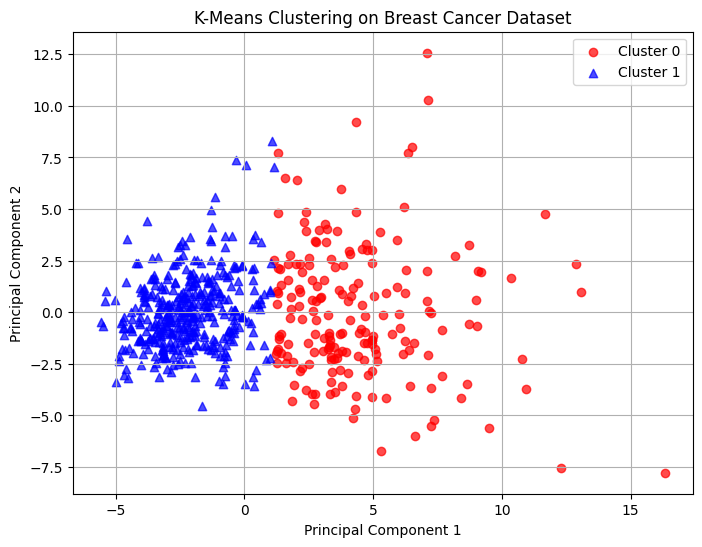

In [17]:
# Plot the K-means clustering results
plt.figure(figsize=(8, 6))
for cluster, color, marker in zip([0, 1], ['red', 'blue'], ['o', '^']):
    subset = bc_kmeans_df[bc_kmeans_df['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], c=color, label=f'Cluster {cluster}', marker=marker, alpha=0.7)

plt.title('K-Means Clustering on Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [ ]:
## End of Notebook ##